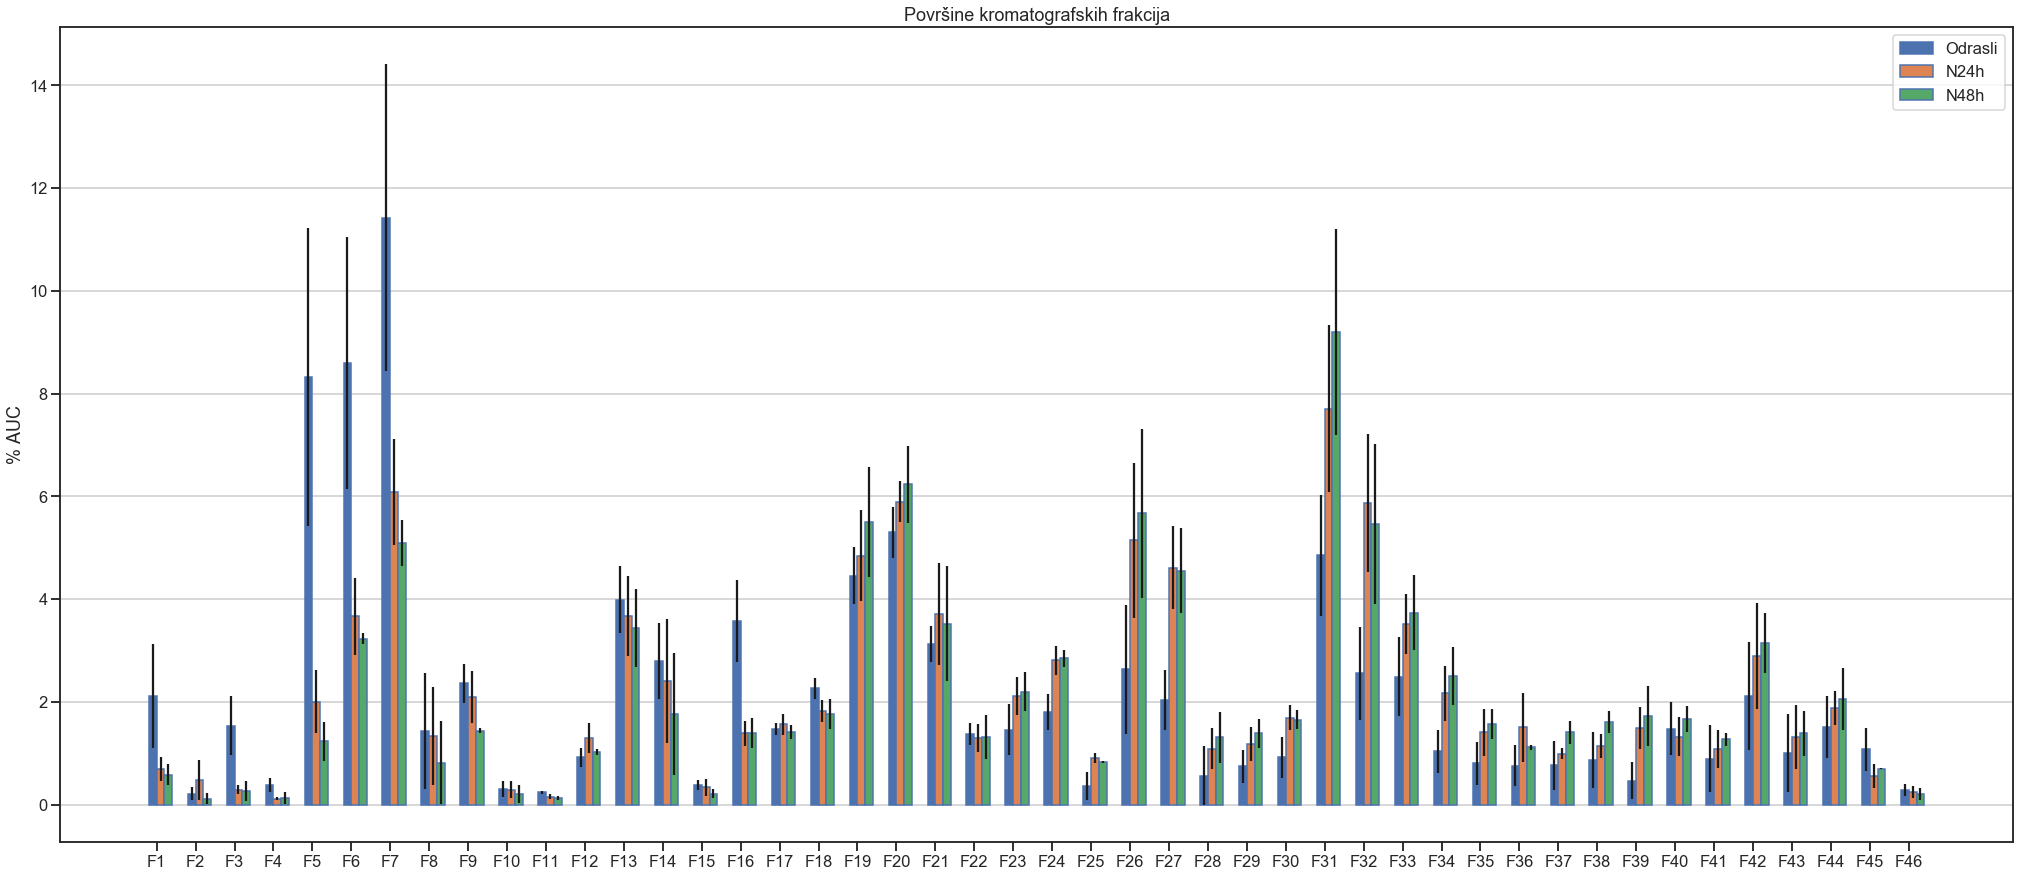

In [59]:
from pprint import pprint
import math
import statistics as st

from statsmodels.stats.multitest import fdrcorrection as fdr
import scipy.stats
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
DATA_LOC = "cleanData_comma.csv"
df = pd.read_csv(DATA_LOC)

def prepare_bar_data(dataframe):
    # get means
    ad_mean = []
    ad_stdev = []
    n24_mean = []
    n24_stdev = []
    n48_mean = []
    n48_stdev = []
    for i in range(1,47):
        ad_mean.append(round(st.mean([i for i in df["AD_"+str(i)].values if not np.isnan(i)]), 3))
        ad_stdev.append(st.stdev([i for i in df["AD_"+str(i)].values if not np.isnan(i)]))
        n24_mean.append(round(st.mean([i for i in df["N24_"+str(i)].values if not np.isnan(i)]), 3))
        n24_stdev.append(st.stdev([i for i in df["N24_"+str(i)].values if not np.isnan(i)]))
        n48_mean.append(round(st.mean([i for i in df["N48_"+str(i)].values if not np.isnan(i)]), 3))
        n48_stdev.append(st.stdev([i for i in df["N48_"+str(i)].values if not np.isnan(i)]))
    # get errors
    return ad_mean, ad_stdev, n24_mean, n24_stdev, n48_mean, n48_stdev



N = 46
mean_ad, std_ad, mean_24, std_24, mean_48, std_48 = prepare_bar_data(df)

ind = np.arange(N) # the x locations for the groups
width = 0.2        # the width of the bars

# making graphs
sns.set_context("talk")
sns.set_style("white",
    {
    'xtick.bottom': True,
    'ytick.left': True,
    'patch.edgecolor': 'b',
    }
)
fig, ax = plt.subplots(figsize=(35, 15))
# command bellow works opposite of what it says when using seaborn
ax.yaxis.grid()
ADULTS = ax.bar(ind, mean_ad, width, yerr=std_ad)
N24s = ax.bar(ind + width, mean_24, width,  yerr=std_24)
N48s = ax.bar(ind + width*2, mean_48, width, yerr=std_48)


# add some text for labels, title and axes ticks
ax.set_ylabel('% AUC')
ax.set_title('Površine kromatografskih frakcija')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels([
    'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 
    'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 
    'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22',
    'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 
    'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 
    'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 
    'F44', 'F45', 'F46'
    ]
)

ax.legend((ADULTS[0], N24s[0], N48s[0]), ('Odrasli', 'N24h', 'N48h'))
plt.show()

In [60]:
fig.savefig("boxplots.pdf")